### Tutorial on finding IC for satellite orbits 

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import icsfinder as icf 
import gala.potential as gp
from gala.dynamics import PhaseSpacePosition
from gala.units import galactic
from astropy import units as u
from scipy.linalg import norm

## Step 1: Define host and DM potentials

This is only done once as we will not be using time-dependent potentials.

In [3]:
host_pot = gp.MilkyWayPotential2022(units=galactic)

In [4]:
sat_pot = gp.NFWPotential(m=1e10, r_s=10, units=galactic)

## Step 2: Inital conditions of the galaxies satellite

In [5]:
mw_ics, lmc_ics = icf.mwlmc_ics()

In [6]:
print(mw_ics, lmc_ics)

pos=(0., 0., 0.) kpc
vel=(0., 0., 0.) km / s pos=(-1.1, -41.1, -27.9) kpc
vel=(-57., -226., 221.) km / s


## Step 3: Define Dynamical Friction parameters 

In [7]:
L = 0.0
C = 1.22
alpha = 1.0
CoulombL = 'VdM'
a = sat_pot.parameters['r_s'].value
df_params = [L, C, a, alpha, CoulombL]

## Step 4: Run orbit

In [8]:
time = 2 * u.Gyr
dt = 0.001 * u.Gyr
Nsteps = time / dt

In [9]:
orbit = icf.Orbit(host_pot, sat_pot, mw_ics, lmc_ics, dt=dt, N=Nsteps)

Integrating orbit for satellite with: 

Host ICs are: 

pos=(0., 0., 0.) kpc
vel=(0., 0., 0.) km / s
Satellites ICs are: 

pos=(-1.1, -41.1, -27.9) kpc
vel=(-57., -226., 221.) km / s


In [10]:
host_pot.density([0,10,0])[0].value

np.float64(68612394.29341385)

In [11]:
orbit_satellite = orbit.sat_orbit(df_params=df_params)

        Use Integrator call method instead. [icsfinder.integrator]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


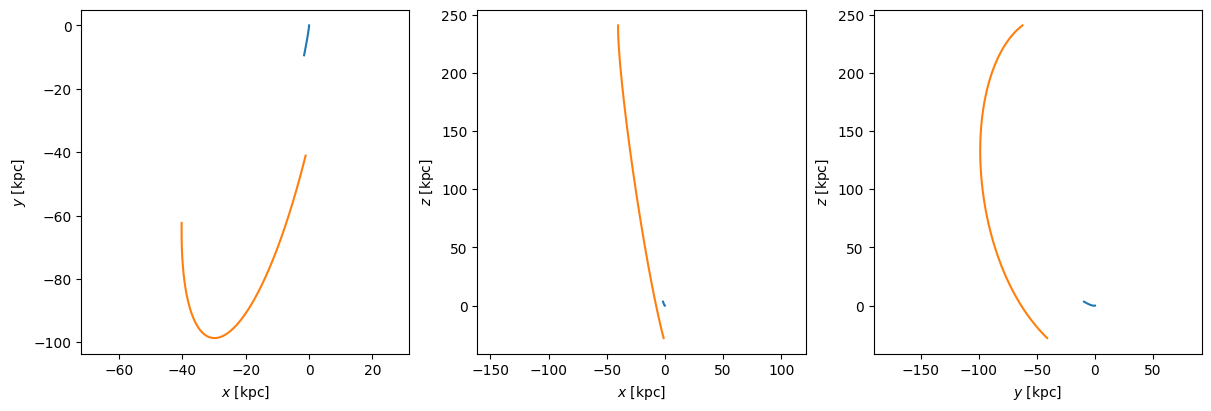

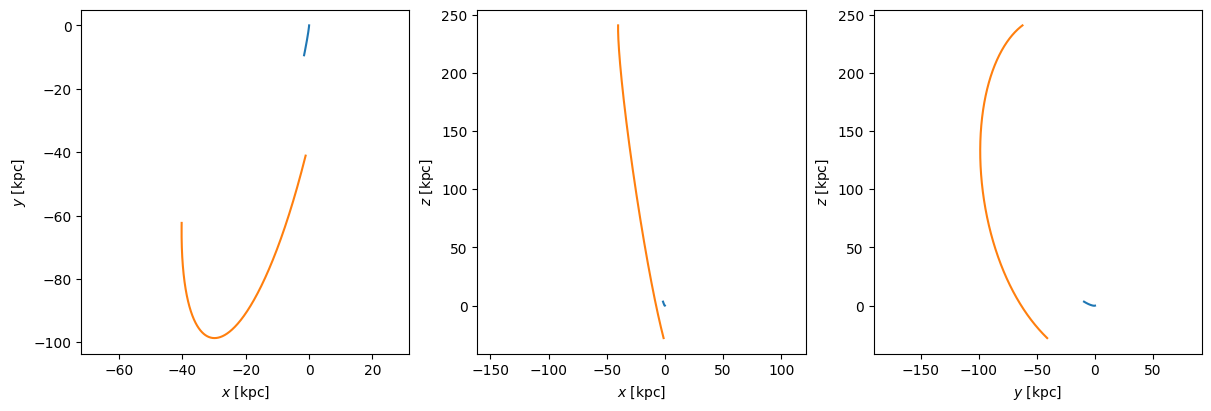

In [12]:
orbit_satellite.plot()

In [18]:
mw_orbit = orbit_satellite.pos[:,0]
lmc_orbit = orbit_satellite.pos[:,1]

In [29]:
mw_orbit.xyz.shape

(3, 2001)

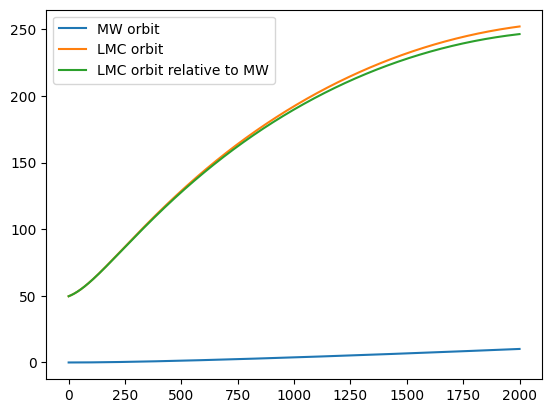

In [36]:
plt.plot(norm(mw_orbit.xyz, axis=0), label='MW orbit')
plt.plot(norm(lmc_orbit.xyz, axis=0), label='LMC orbit')
plt.plot(norm(lmc_orbit.xyz-mw_orbit.xyz, axis=0), label='LMC orbit relative to MW')
plt.legend()

Let's sample now different values of C to see the effect on the orbit. 

In [46]:
def df_params(C):
    L=0
    alpha=1
    CoulombL = 'VdM'
    a = sat_pot.parameters['r_s'].value
    df_params = [L, C, a, alpha, CoulombL]
    return df_params

In [47]:
C_sample = np.linspace(0.5, 2.0, 50)

In [54]:
df_sample = list(map(df_params, C_sample))

In [55]:
def sample_orbit(df_params):
    orbit_df_sample = orbit.sat_orbit(df_params=df_params)
    mw_orbit = orbit_df_sample.pos[:,0]
    lmc_orbit = orbit_df_sample.pos[:,1]
    return norm(lmc_orbit.xyz-mw_orbit.xyz, axis=0)


In [58]:
orbits_lmc_df = list(map(sample_orbit, df_sample))

        Use Integrator call method instead. [icsfinder.integrator]


In [61]:
len(orbits_lmc_df)

50

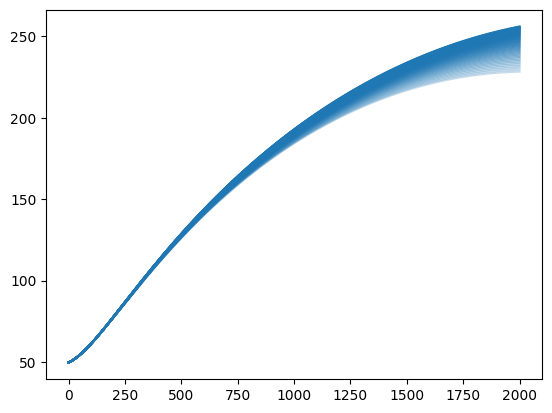

In [72]:
i=0
for orbit in orbits_lmc_df:
    plt.plot(orbit, c='C0', alpha=C_sample[i]/2.0)
    i+=1